In [6]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from dataset_benchmark.datasets import NpzBenchmarkDataset, HfArrowBenchmarkDataset, Hdf5BenchmarkDatset, PickleBenchmarkDataset
from dataset_benchmark.evaluation import benchmark_plain_loading

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# run benchmark for dataloading without data loader
results_plain_loading = benchmark_plain_loading(
    # dataset_classes=[NpzBenchmarkDataset, HfArrowBenchmarkDataset, Hdf5BenchmarkDatset],
    # dataset_classes=[NpzBenchmarkDataset, Hdf5BenchmarkDatset],
    dataset_classes=[NpzBenchmarkDataset, Hdf5BenchmarkDatset, PickleBenchmarkDataset],
    n_rows=[10, 100, 500, 1000],
    n_values_per_row=[10, 100, 1000, 10_000, 100_000, 1_000_000, 5_000_000, 10_000_000],
    shuffle=[False, True],
    max_dataset_size=100_000_000_000,
    n_repeats=2,
    dataset_init_kwargs=None,
)

df_plain = pd.DataFrame(results_plain_loading)
df_plain["total_bytes"] = df_plain["n_rows"] * df_plain["n_values_per_row"] * 8
df_plain["mb_per_second"] = df_plain["total_bytes"] / df_plain["time"] / 1_000_000
df_plain["rows_per_second"] = df_plain["n_rows"] / df_plain["time"]

dataset_class:   0%|          | 0/3 [00:00<?, ?it/s]

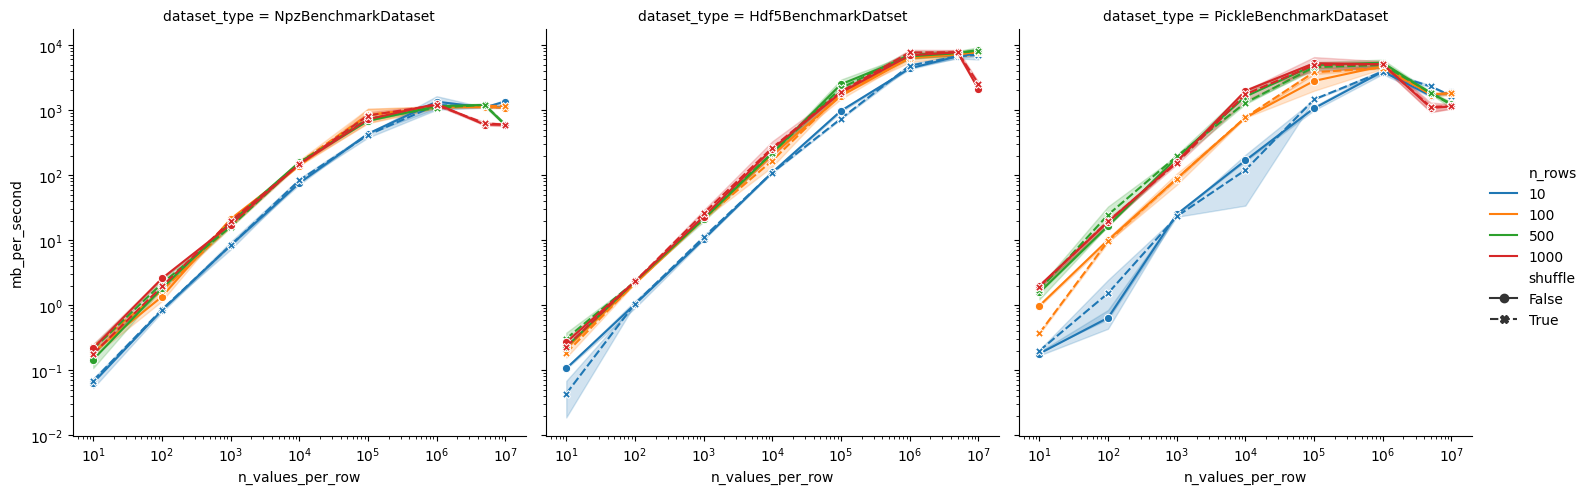

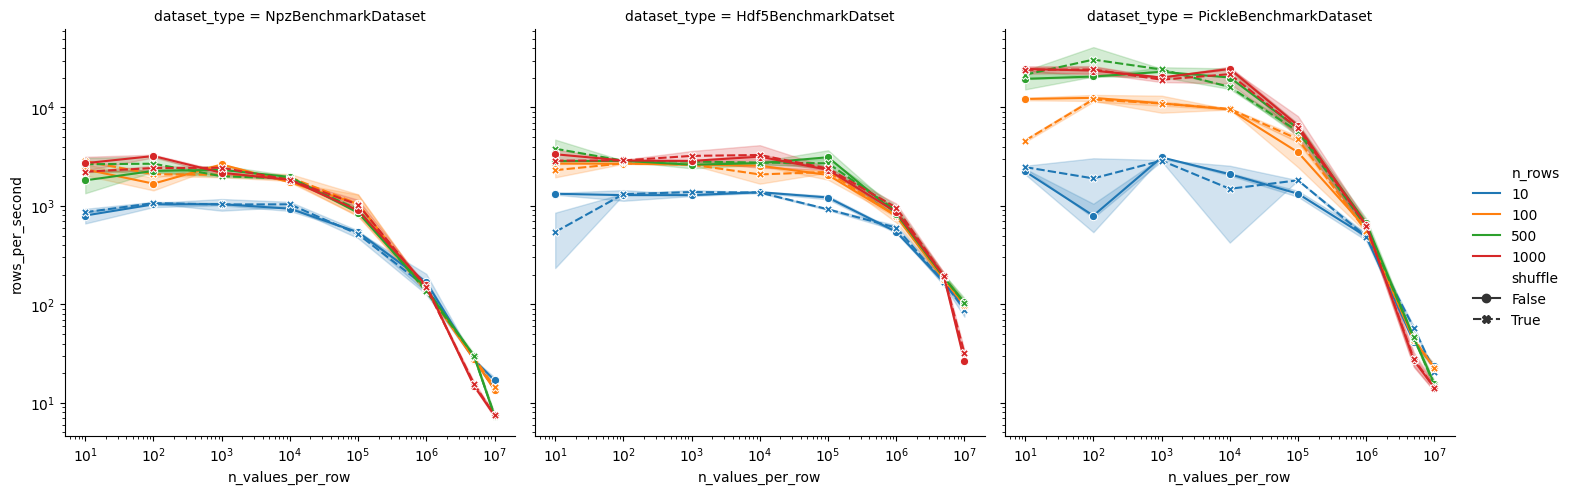

In [8]:
# visualize the results for the plain loading

sns.relplot(
    data=df_plain,
    x="n_values_per_row",
    y="mb_per_second",
    hue=df_plain["n_rows"].astype(str),
    style=df_plain["shuffle"],
    errorbar=("pi", 100),
    markers=True,
    kind="line",
    col="dataset_type",
)
plt.xscale("log")
plt.yscale("log")
plt.show()

sns.relplot(
    data=df_plain,
    x="n_values_per_row",
    y="rows_per_second",
    hue=df_plain["n_rows"].astype(str),
    style=df_plain["shuffle"],
    errorbar=("pi", 100),
    markers=True,
    kind="line",
    col="dataset_type",
)
plt.xscale("log")
plt.yscale("log")
plt.show()

# sns.relplot(
#     data=df_plain,
#     x="n_rows",
#     y="mb_per_second",
#     hue=df_plain["n_values_per_row"].astype(str),
#     style=df_plain["shuffle"],
#     errorbar=("pi", 100),
#     markers=True,
#     kind="line",
#     col="dataset_type",
# )
# plt.xscale("log")
# plt.yscale("log")
# plt.show()

# sns.relplot(
#     data=df_plain,
#     x="n_rows",
#     y="rows_per_second",
#     hue=df_plain["n_values_per_row"].astype(str),
#     style=df_plain["shuffle"],
#     errorbar=("pi", 100),
#     markers=True,
#     kind="line",
#     col="dataset_type",
# )
# plt.xscale("log")
# plt.yscale("log")
# plt.show()